## Description

Notebook to plot the total/individual decay widths as well as the individual branching ratios. Load functions defined in the HNL OscNext software and vectorize them. Then plot:

* total/indiviudal decay widths (lin/log)
* individual branching ratios
* total/individual proper lifetimes (for mixing of 1.0)
* decay length vs energy for chosen masses/mixing

In [1]:
import sys, os
import numpy as np

from collections import OrderedDict

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

style_file = os.path.expandvars('$I3_SRC/LeptonInjector/python/hnl_mpl_plotstyle.mplstyle')
plt.style.use(style_file)

# import total/individual decay widths
from icecube.LeptonInjector.hnl_weighting import LIGHTSPEED  # in m/s
from icecube.LeptonInjector.hnl_weighting import REDUCEDPLANCK  # in GeV*s

# base_plot_dir = '/data/user/lfischer/plots_all/2022/10_current_decay_widths/'
base_plot_dir = '/data/user/lfischer/plots_all/2023/02_HNL_decay_length/'
print(base_plot_dir)

/data/user/lfischer/plots_all/2023/02_HNL_decay_length/


### Import total/indiviudal decay widths and make them array compatible

In [2]:
# import total/individual decay widths
from icecube.LeptonInjector import HNLDecayEnergy

In [3]:
FullWidth = np.vectorize( lambda x: HNLDecayEnergy.FullWidth(x) )

In [4]:
gamma_nu_nu_nu_overload = np.vectorize( lambda x: HNLDecayEnergy.gamma_nu_nu_nu_overload(x) )
gamma_e_e = np.vectorize( lambda x: HNLDecayEnergy.gamma_e_e(x) )
gamma_p0_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_p0_nu(x) )
gamma_nu_mu_mu = np.vectorize( lambda x: HNLDecayEnergy.gamma_nu_mu_mu(x) )
gamma_eta_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_eta_nu(x) )
gamma_rho0_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_rho0_nu(x) )
gamma_omega_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_omega_nu(x) )
gamma_etaprime_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_etaprime_nu(x) )
gamma_phi_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_phi_nu(x) )
gamma_nue_e_tau = np.vectorize( lambda x: HNLDecayEnergy.gamma_nue_e_tau(x) )
gamma_numu_mu_tau = np.vectorize( lambda x: HNLDecayEnergy.gamma_numu_mu_tau(x) )
gamma_tau_pi = np.vectorize( lambda x: HNLDecayEnergy.gamma_tau_pi(x) )
gamma_tau_K = np.vectorize( lambda x: HNLDecayEnergy.gamma_tau_K(x) )
gamma_tau_rho = np.vectorize( lambda x: HNLDecayEnergy.gamma_tau_rho(x) )

### Plot decay widths

/data/user/lfischer/plots_all/2023/02_HNL_decay_length/hnl_decay_widths_up_to_2.0_GeV_linear.png


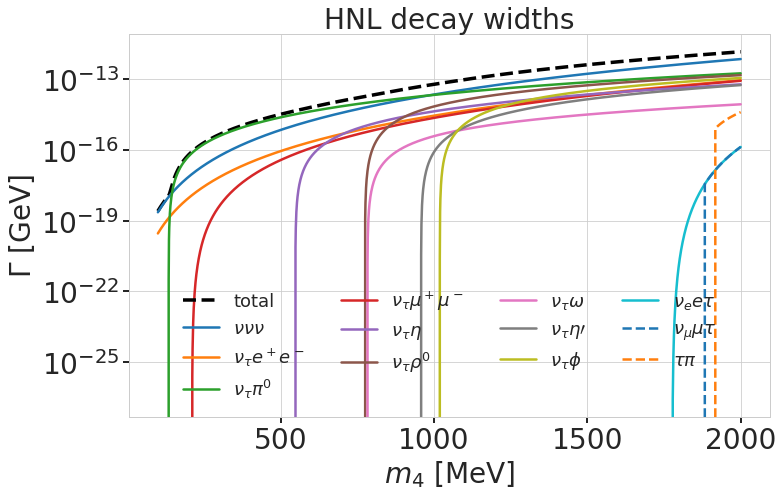

In [5]:
hnl_mass_bins = {
#     'linear':np.linspace(0.1, 3., 2000),
#     'log':np.geomspace(0.1, 3., 2000),
    
    'linear':np.linspace(0.1, 2., 2000),
    'log':np.geomspace(0.1, 2., 2000),
}

x_scales = [
    'linear',
    'log',
]

for x_scale in x_scales:
    
    hnl_mass = hnl_mass_bins[x_scale]
    
    full_decay_width = FullWidth(hnl_mass)

    decay_00 = gamma_nu_nu_nu_overload(hnl_mass)
    decay_01 = gamma_e_e(hnl_mass)
    decay_02 = gamma_p0_nu(hnl_mass)
    decay_03 = gamma_nu_mu_mu(hnl_mass)
    decay_04 = gamma_eta_nu(hnl_mass)
    decay_05 = gamma_rho0_nu(hnl_mass)
    decay_06 = gamma_omega_nu(hnl_mass)
    decay_07 = gamma_etaprime_nu(hnl_mass)
    decay_08 = gamma_phi_nu(hnl_mass)
    decay_09 = gamma_nue_e_tau(hnl_mass)
    decay_10 = gamma_numu_mu_tau(hnl_mass)
    decay_11 = gamma_tau_pi(hnl_mass)
    decay_12 = gamma_tau_K(hnl_mass)
    decay_13 = gamma_tau_rho(hnl_mass)

    hnl_mass *= 1000
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,7))

    lw_sub = 2.5

    # plot decay widths
    ax.plot(hnl_mass, full_decay_width, lw=3.5, color='k', label='total', ls='dashed')
    ax.plot(hnl_mass, decay_00, lw=lw_sub, label=r'$\nu\nu\nu$')
    ax.plot(hnl_mass, decay_01, lw=lw_sub, label=r'$\nu_\tau e^+e^-$')
    ax.plot(hnl_mass, decay_02, lw=lw_sub, label=r'$\nu_\tau\pi^0$')
    ax.plot(hnl_mass, decay_03, lw=lw_sub, label=r'$\nu_\tau \mu^+\mu^-$')
    ax.plot(hnl_mass, decay_04, lw=lw_sub, label=r'$\nu_\tau\eta$')
    ax.plot(hnl_mass, decay_05, lw=lw_sub, label=r'$\nu_\tau\rho^0$')
    ax.plot(hnl_mass, decay_06, lw=lw_sub, label=r'$\nu_\tau\omega$')
    ax.plot(hnl_mass, decay_07, lw=lw_sub, label=r'$\nu_\tau\eta\prime$')
    ax.plot(hnl_mass, decay_08, lw=lw_sub, label=r'$\nu_\tau\phi$')
    ax.plot(hnl_mass, decay_09, lw=lw_sub, label=r'$\nu_e e \tau$')
    ax.plot(hnl_mass, decay_10, lw=lw_sub, label=r'$\nu_\mu \mu \tau$', ls='dashed')
    ax.plot(hnl_mass, decay_11, lw=lw_sub, label=r'$\tau \pi$', ls='dashed')
#     not needed below 2 GeV
#     ax.plot(hnl_mass, decay_12, lw=lw_sub, label=r'$\tau K$', ls='dashed')
#     ax.plot(hnl_mass, decay_13, lw=lw_sub, label=r'$\tau \rho$', ls='dashed')
    ax.set_title(r'HNL decay widths')
    ax.set_ylabel(r'$\Gamma$ [GeV]')
    
    ax.set_xlabel(r'$m_4$ [MeV]')

    ax.set_xscale(x_scale)
    ax.set_yscale('log')

    plt.grid(True, which="both", axis='x')

    ax.legend(
        fontsize=18,
        loc='lower center',
        ncol=4,
    )

    fig.tight_layout()
    
#     filename = 'hnl_decay_widths_{}.png'.format(x_scale)
    filename = 'hnl_decay_widths_up_to_2.0_GeV_{}.png'.format(x_scale)

    filepath = os.path.join(base_plot_dir,filename)
    print(filepath)
#     fig.savefig(filepath, dpi=300)

    break

### Plot branching ratios

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in divide
/cvm

/data/user/lfischer/plots_all/2023/02_HNL_decay_length/branching_ratios_linear_up_to_2GeV.png


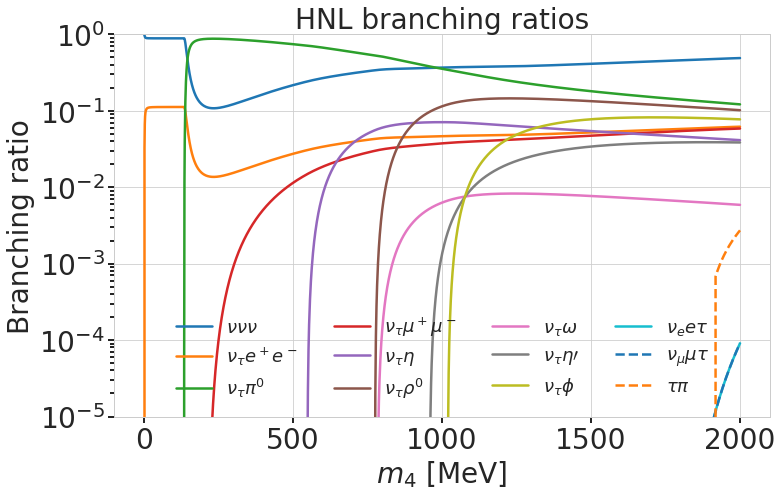

In [6]:
hnl_mass_bins = OrderedDict()

# hnl_mass_bins['linear_paper_comparison'] = np.linspace(0.0, 2., 2000)
hnl_mass_bins['linear_up_to_2GeV'] = np.linspace(0.0, 2., 2000)
hnl_mass_bins['linear'] = np.linspace(0.1, 3., 2000)
hnl_mass_bins['log'] = np.geomspace(0.1, 3., 2000)
hnl_mass_bins['log_up_to_2GeV'] = np.geomspace(0.1, 2., 2000)

x_scales = [
    'linear',
    'linear',
    'log',
    'log',
]

for key, x_scale in zip(hnl_mass_bins.keys(),x_scales):
    
    hnl_mass = hnl_mass_bins[key]
    
    full_decay_width = FullWidth(hnl_mass)

    decay_00 = gamma_nu_nu_nu_overload(hnl_mass)
    decay_01 = gamma_e_e(hnl_mass)
    decay_02 = gamma_p0_nu(hnl_mass)
    decay_03 = gamma_nu_mu_mu(hnl_mass)
    decay_04 = gamma_eta_nu(hnl_mass)
    decay_05 = gamma_rho0_nu(hnl_mass)
    decay_06 = gamma_omega_nu(hnl_mass)
    decay_07 = gamma_etaprime_nu(hnl_mass)
    decay_08 = gamma_phi_nu(hnl_mass)
    decay_09 = gamma_nue_e_tau(hnl_mass)
    decay_10 = gamma_numu_mu_tau(hnl_mass)
    decay_11 = gamma_tau_pi(hnl_mass)
    decay_12 = gamma_tau_K(hnl_mass)
    decay_13 = gamma_tau_rho(hnl_mass)

    hnl_mass *= 1000
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,7))

    lw_sub = 2.5

    # plot branching ratios
    ax.plot(hnl_mass, decay_00/full_decay_width, lw=lw_sub, label=r'$\nu\nu\nu$')
    ax.plot(hnl_mass, decay_01/full_decay_width, lw=lw_sub, label=r'$\nu_\tau e^+e^-$')
    ax.plot(hnl_mass, decay_02/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\pi^0$')
    ax.plot(hnl_mass, decay_03/full_decay_width, lw=lw_sub, label=r'$\nu_\tau \mu^+\mu^-$')
    ax.plot(hnl_mass, decay_04/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\eta$')
    ax.plot(hnl_mass, decay_05/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\rho^0$')
    ax.plot(hnl_mass, decay_06/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\omega$')
    ax.plot(hnl_mass, decay_07/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\eta\prime$')
    ax.plot(hnl_mass, decay_08/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\phi$')
    ax.plot(hnl_mass, decay_09/full_decay_width, lw=lw_sub, label=r'$\nu_e e \tau$')
    ax.plot(hnl_mass, decay_10/full_decay_width, lw=lw_sub, label=r'$\nu_\mu \mu \tau$', ls='dashed')
    ax.plot(hnl_mass, decay_11/full_decay_width, lw=lw_sub, label=r'$\tau \pi$', ls='dashed')
    if key in ['linear', 'log']:
        ax.plot(hnl_mass, decay_12/full_decay_width, lw=lw_sub, label=r'$\tau K$', ls='dashed')
        ax.plot(hnl_mass, decay_13/full_decay_width, lw=lw_sub, label=r'$\tau \rho$', ls='dashed')
    ax.set_title('HNL branching ratios')
    ax.set_ylabel(r'Branching ratio')
    
#     pilars paper
    ax.set_ylim(1e-5, 1e-00)

#     ax.set_xlabel(r'$m_{HNL}$ [MeV]')
    ax.set_xlabel(r'$m_4$ [MeV]')

    ax.set_xscale(x_scale)
    ax.set_yscale('log')

    plt.grid(True, which="both", axis='x')

    ax.legend(
        fontsize=18,
        loc='lower center',
        ncol=4,
    )

    fig.tight_layout()
    
    filename = 'branching_ratios_{}.png'.format(key)
    
    filepath = os.path.join(base_plot_dir,filename)
    print(filepath)
#     fig.savefig(filepath, dpi=300)

    break

### Plot proper lifetime

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in divid

/data/user/lfischer/plots_all/2023/02_HNL_decay_length/proper_lifetimes_up_to_2_GeV_linear.png


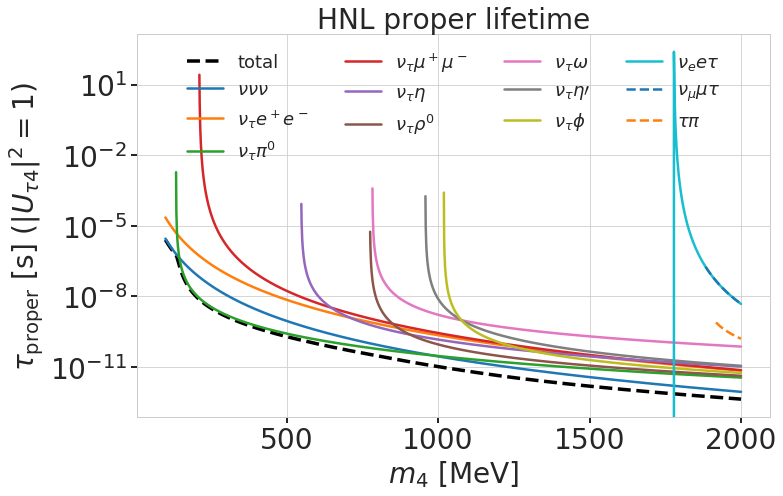

In [7]:
hnl_mass_bins = {
#     'linear':np.linspace(0.1, 3., 2000),
#     'log':np.geomspace(0.1, 3., 2000),
    
    'linear':np.linspace(0.1, 2., 2000),
    'log':np.geomspace(0.1, 2., 2000),
}

x_scales = [
    'linear',
    'log',
]

for x_scale in x_scales:
    
    hnl_mass = hnl_mass_bins[x_scale]
    
    full_decay_width = FullWidth(hnl_mass)

    decay_00 = gamma_nu_nu_nu_overload(hnl_mass)
    decay_01 = gamma_e_e(hnl_mass)
    decay_02 = gamma_p0_nu(hnl_mass)
    decay_03 = gamma_nu_mu_mu(hnl_mass)
    decay_04 = gamma_eta_nu(hnl_mass)
    decay_05 = gamma_rho0_nu(hnl_mass)
    decay_06 = gamma_omega_nu(hnl_mass)
    decay_07 = gamma_etaprime_nu(hnl_mass)
    decay_08 = gamma_phi_nu(hnl_mass)
    decay_09 = gamma_nue_e_tau(hnl_mass)
    decay_10 = gamma_numu_mu_tau(hnl_mass)
    decay_11 = gamma_tau_pi(hnl_mass)
    decay_12 = gamma_tau_K(hnl_mass)
    decay_13 = gamma_tau_rho(hnl_mass)

    hnl_mass *= 1000
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,9))
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,7))

    lw_sub = 2.5
    
    # plot proper lifetimes
    hbar = REDUCEDPLANCK

    # plot decay widths
    ax.plot(hnl_mass, hbar/full_decay_width, lw=3.5, color='k', label='total', ls='dashed')
    ax.plot(hnl_mass, hbar/decay_00, lw=lw_sub, label=r'$\nu\nu\nu$')
    ax.plot(hnl_mass, hbar/decay_01, lw=lw_sub, label=r'$\nu_\tau e^+e^-$')
    ax.plot(hnl_mass, hbar/decay_02, lw=lw_sub, label=r'$\nu_\tau\pi^0$')
    ax.plot(hnl_mass, hbar/decay_03, lw=lw_sub, label=r'$\nu_\tau \mu^+\mu^-$')
    ax.plot(hnl_mass, hbar/decay_04, lw=lw_sub, label=r'$\nu_\tau\eta$')
    ax.plot(hnl_mass, hbar/decay_05, lw=lw_sub, label=r'$\nu_\tau\rho^0$')
    ax.plot(hnl_mass, hbar/decay_06, lw=lw_sub, label=r'$\nu_\tau\omega$')
    ax.plot(hnl_mass, hbar/decay_07, lw=lw_sub, label=r'$\nu_\tau\eta\prime$')
    ax.plot(hnl_mass, hbar/decay_08, lw=lw_sub, label=r'$\nu_\tau\phi$')
    ax.plot(hnl_mass, hbar/decay_09, lw=lw_sub, label=r'$\nu_e e \tau$')
    ax.plot(hnl_mass, hbar/decay_10, lw=lw_sub, label=r'$\nu_\mu \mu \tau$', ls='dashed')
    ax.plot(hnl_mass, hbar/decay_11, lw=lw_sub, label=r'$\tau \pi$', ls='dashed')
#     not needed below 2 GeV
#     ax.plot(hnl_mass, hbar/decay_12, lw=lw_sub, label=r'$\tau K$', ls='dashed')
#     ax.plot(hnl_mass, hbar/decay_13, lw=lw_sub, label=r'$\tau \rho$', ls='dashed')
    ax.set_title('HNL proper lifetime')
    ax.set_ylabel(r'$\tau_\mathrm{proper}$ [s] ($|U_{\tau4}|^2=1$)')
    
    ax.legend(
        fontsize=18,
        loc='upper center',
        ncol=4,
    )

    ax.set_xscale(x_scale)
    ax.set_yscale('log')

    #     ax.set_xlabel(r'$m_{HNL}$ [MeV]')
    ax.set_xlabel(r'$m_4$ [MeV]')

    plt.grid(True, which="both", axis='x')

    fig.tight_layout()
    
#     filename = 'proper_lifetimes_{}.png'.format(x_scale)
    filename = 'proper_lifetimes_up_to_2_GeV_{}.png'.format(x_scale)

    filepath = os.path.join(base_plot_dir,filename)
    print(filepath)
#     fig.savefig(filepath, dpi=300)

    break

### Plot decay length for the chosen masses with respect to energy

In [8]:
def gamma_from_Ekin(Ekin, mass):
    return (Ekin+mass)/mass

def beta_from_Ekin(Ekin, mass):
    return np.sqrt(1-1/gamma_from_Ekin(Ekin, mass)**2)

def gamma_from_beta(beta):
    return 1./np.sqrt(1-beta**2)

def beta_from_gamma(gamma):
    return np.sqrt(1-1/gamma**2)

hbar = REDUCEDPLANCK
speed_of_light = LIGHTSPEED

### Plot for individual mixings

In [9]:
chosen_hnl_masses = [0.1, 0.3, 0.6, 1.0]
energies = np.geomspace(1e-01, 1e3, 50)
# energies = np.linspace(0, 100, 50)

mixings = [1.0e-00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04]
# u_tau4_sq = 1.0e-00

/data/user/lfischer/plots_all/2023/02_HNL_decay_length/decay_length_vs_energy_u_tau4_sq_1e+00_mcregion.png


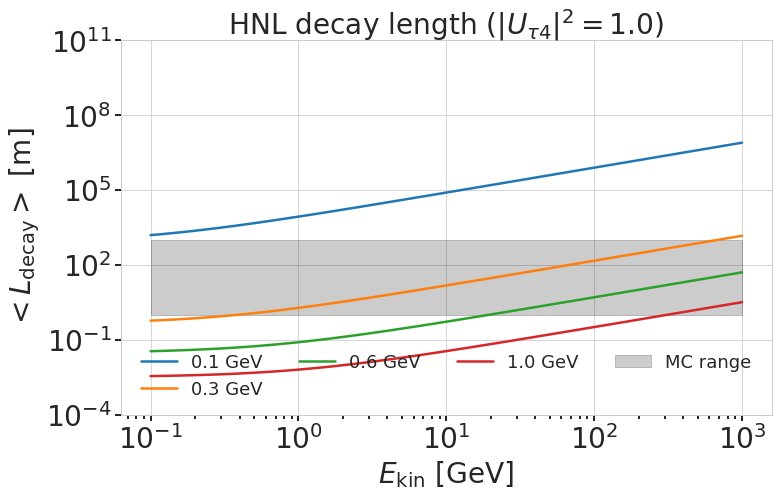

In [10]:
for u_tau4_sq in mixings:
    
    chosen_full_decay_widths = FullWidth(chosen_hnl_masses)

    chosen_proper_lifetimes = hbar/(chosen_full_decay_widths * u_tau4_sq)

    gamma_factors = OrderedDict()
    beta_factors = OrderedDict()

    for chosen_hnl_mass in chosen_hnl_masses:
        chosen_hnl_mass_array = np.full_like(energies, chosen_hnl_mass)
        
        gamma_factors[chosen_hnl_mass] = gamma_from_Ekin(energies, chosen_hnl_mass_array)
        beta_factors[chosen_hnl_mass] = beta_from_Ekin(energies, chosen_hnl_mass_array)
        
#         np.testing.assert_array_almost_equal(gamma_factors[chosen_hnl_mass], gamma_from_beta(beta_factors[chosen_hnl_mass]))

    lifetimes = OrderedDict()

    for count, (key, item) in enumerate(gamma_factors.items()):
    #     print(count)
    #     print(key)
        lifetimes[key] = item * chosen_proper_lifetimes[count]  # gamma*tau=t

    decay_lengths = OrderedDict()

    for key, item in lifetimes.items():
        decay_lengths[key] = item * speed_of_light

    lw_sub = 2.5

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,7))

    for chosen_hnl_mass in chosen_hnl_masses:

        # plot distance
        ax.plot(
            energies,
            decay_lengths[chosen_hnl_mass],
            lw=lw_sub,
            label=r'{:.1f} GeV'.format(chosen_hnl_mass),
#             label=r'$m_4$={:.1f} GeV'.format(chosen_hnl_mass),
        )

    
    ax.fill_between(energies, 1., 1000., color='k', alpha=0.2, label='MC range')
        
    ax.set_title(r'HNL decay length ($|U_{{\tau4}}|^2={}$)'.format(u_tau4_sq))

    ax.set_ylabel(r'$<L_{\rm decay}>$ [m]')

    ax.legend(
        fontsize=18,
        loc='lower center',
        ncol=4,
    )


    ax.set_xlabel(r'$E_{\rm kin}$ [GeV]')
    
    ax.set_ylim(1.0e-04, 1e11)

    ax.set_yscale('log')
    ax.set_xscale('log')

    fig.tight_layout()

#     filename = 'decay_length_vs_energy_u_tau4_sq_{:.0e}.png'.format(u_tau4_sq)
#     filename = 'decay_length_vs_energy_u_tau4_sq_{:.0e}_fixy.png'.format(u_tau4_sq)
    filename = 'decay_length_vs_energy_u_tau4_sq_{:.0e}_mcregion.png'.format(u_tau4_sq)

    filepath = os.path.join(base_plot_dir,filename)
    print(filepath)
#     fig.savefig(filepath, dpi=300)
    
    break

### Plot for individual masses

In [11]:
chosen_hnl_masses = [0.1, 0.3, 0.6, 1.0]
energies = np.geomspace(1e-01, 1e3, 50)
# energies = np.linspace(0, 100, 50)

mixings = [1.0e-00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04]
# u_tau4_sq = 1.0e-00

/data/user/lfischer/plots_all/2023/02_HNL_decay_length/decay_length_vs_energy_m4_1e-01_mcregion.png


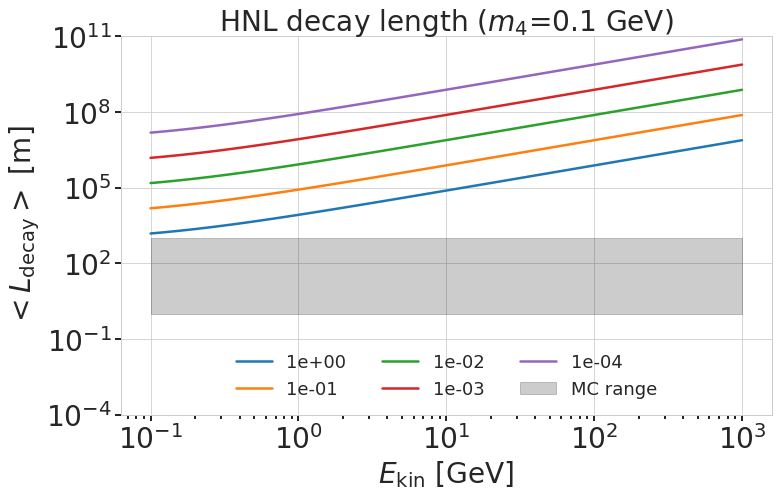

In [12]:
for chosen_hnl_mass in chosen_hnl_masses:    
   
    chosen_full_decay_width = FullWidth(chosen_hnl_mass)

    gamma_factors = OrderedDict()
    beta_factors = OrderedDict()
    lifetimes = OrderedDict()
    decay_lengths = OrderedDict()
    
    for u_tau4_sq in mixings:
        
        chosen_proper_lifetime = hbar/(chosen_full_decay_width * u_tau4_sq)
        
        chosen_hnl_mass_array = np.full_like(energies, chosen_hnl_mass)
        
        gamma_factors[u_tau4_sq] = gamma_from_Ekin(energies, chosen_hnl_mass_array)
        beta_factors[u_tau4_sq] = beta_from_Ekin(energies, chosen_hnl_mass_array)
        
#         np.testing.assert_array_almost_equal(gamma_factors[u_tau4_sq], gamma_from_beta(beta_factors[u_tau4_sq]))

        lifetimes[u_tau4_sq] = gamma_factors[u_tau4_sq] * chosen_proper_lifetime  # gamma*tau=t

        decay_lengths[u_tau4_sq] = lifetimes[u_tau4_sq]  * speed_of_light

    lw_sub = 2.5

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,7))

    for u_tau4_sq in mixings:

        # plot distance
        ax.plot(
            energies,
            decay_lengths[u_tau4_sq],
            lw=lw_sub,
            label=r'{:.0e}'.format(u_tau4_sq),
#             label=r'$m_4$={:.1f} GeV'.format(chosen_hnl_mass),
        )

    ax.fill_between(energies, 1., 1000., color='k', alpha=0.2, label='MC range')
        
    ax.set_title(r'HNL decay length ($m_4$={:.1f} GeV)'.format(chosen_hnl_mass))

    ax.set_ylabel(r'$<L_{\rm decay}>$ [m]')

    ax.legend(
        fontsize=18,
        loc='lower center',
        ncol=3,
    )

    ax.set_xlabel(r'$E_{\rm kin}$ [GeV]')
    
    ax.set_ylim(1.0e-04, 1e11)

    ax.set_xscale('log')
    ax.set_yscale('log')

    fig.tight_layout()

#     filename = 'decay_length_vs_energy_m4_{:.0e}_lin.png'.format(chosen_hnl_mass)
#     filename = 'decay_length_vs_energy_m4_{:.0e}_fixy.png'.format(chosen_hnl_mass)
    filename = 'decay_length_vs_energy_m4_{:.0e}_mcregion.png'.format(chosen_hnl_mass)

    filepath = os.path.join(base_plot_dir,filename)
    print(filepath)
#     fig.savefig(filepath, dpi=300)
    
    break